In [27]:
import pandas as pd
balanced_data = pd.read_csv("balanced_data.csv")
# Features und Ziel
X = balanced_data.drop(columns='target')
Y = balanced_data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,stratify=Y, test_size = 0.2, random_state=22)

In [28]:
def plot_grid_search_2d(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
# Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1),len(grid_param_2))
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_1):
        ax.plot(grid_param_2, scores_mean[idx,:], '-o', label= name_param_1 + ': ' + str(val))
        ax.set_title("Grid Search Scores", fontsize=12, fontweight='bold')
        ax.set_xlabel(name_param_2, fontsize=10)
        ax.set_ylabel('CV Average Validation Accuracy', fontsize=10)
        ax.legend(loc="best", fontsize=8)
        ax.grid('on')

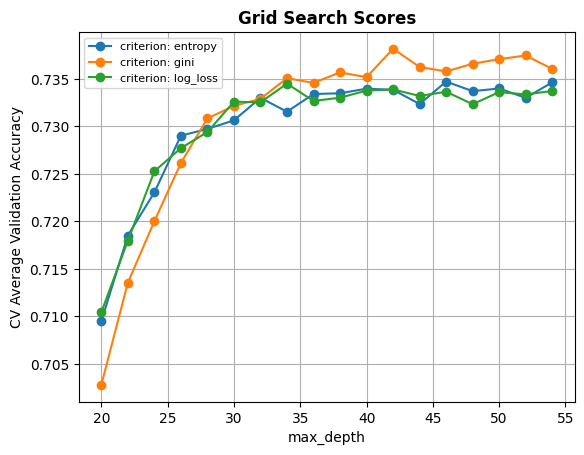

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

etmodel = DecisionTreeClassifier()
param_grid = [
     {'max_depth': range(20, 55, 2),
      'criterion': ['entropy', 'gini',"log_loss"]}
]

CV_etmodel = GridSearchCV(estimator=etmodel, 
                          param_grid=param_grid, 
                          cv=10, 
                          scoring='accuracy')
CV_etmodel.fit(X_train, Y_train)

plot_grid_search_2d(CV_etmodel.cv_results_, param_grid[0]['criterion'], param_grid[0]['max_depth'], 'criterion', 'max_depth')


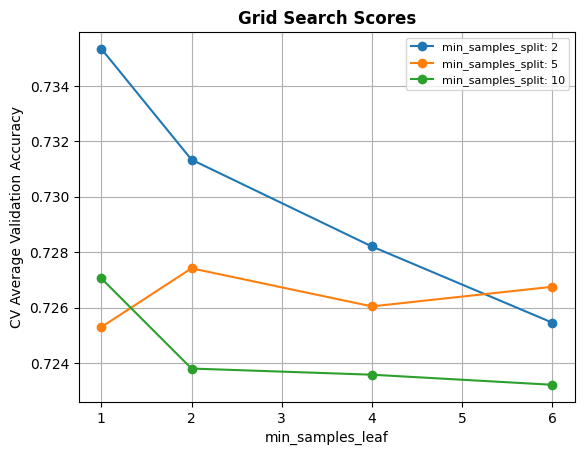

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

etmodel = DecisionTreeClassifier()
param_grid = [
     {'max_depth': [44],
      'criterion': ['gini'],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4, 6]}
]

CV_etmodel_2 = GridSearchCV(estimator=etmodel, 
                          param_grid=param_grid, 
                          cv=10, 
                          scoring='accuracy')
CV_etmodel_2.fit(X_train, Y_train)

plot_grid_search_2d(CV_etmodel_2.cv_results_, param_grid[0]['min_samples_split'], param_grid[0]['min_samples_leaf'], 'min_samples_split', 'min_samples_leaf')

In [42]:
etmodel = etmodel.set_params(**CV_etmodel.best_params_)

etmodel.fit(X_train, Y_train)

# Accuracy auf Trainings- und Testdaten berechnen
train_acc = etmodel.score(X_train, Y_train)
test_acc =  etmodel.score(X_test, Y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.9962
Test Accuracy: 0.7393


In [ ]:
from sklearn.metrics import classification_report
prediction = etmodel.predict(X_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           1       0.72      0.78      0.75      1375
           2       0.55      0.54      0.55      1375
           3       0.55      0.51      0.53      1375
           4       0.70      0.76      0.73      1375
           5       0.97      0.96      0.97      1375
           6       0.84      0.82      0.83      1375
           7       0.74      0.74      0.74      1375
           8       0.81      0.76      0.78      1375
           9       0.78      0.78      0.78      1375

    accuracy                           0.74     12375
   macro avg       0.74      0.74      0.74     12375
weighted avg       0.74      0.74      0.74     12375



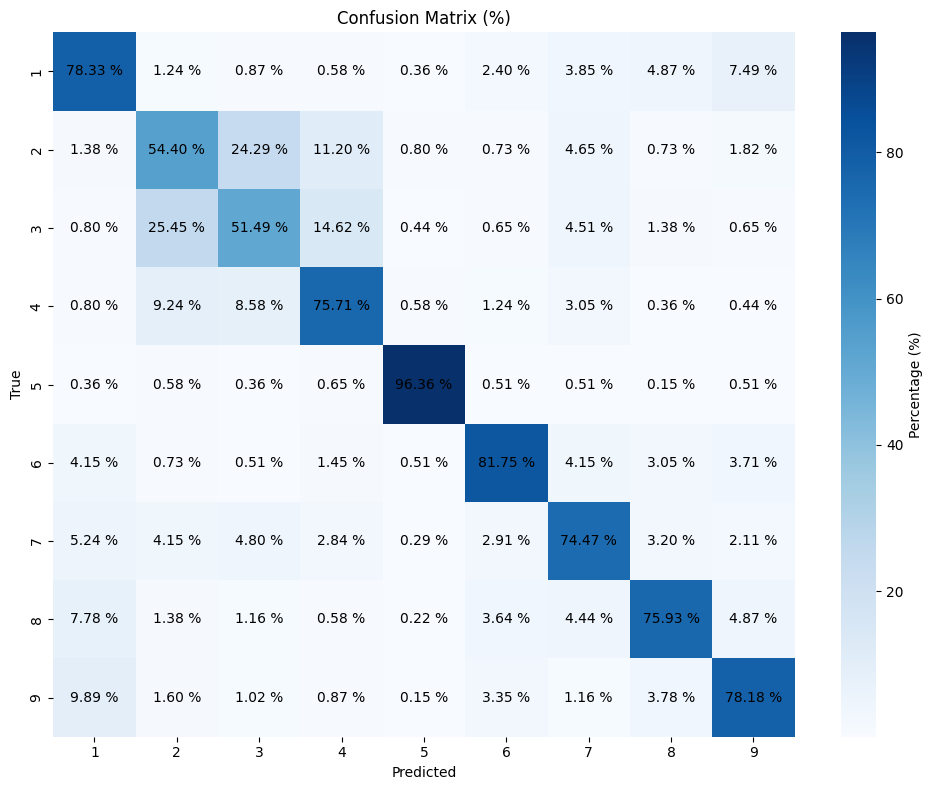

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, prediction)
label_names = sorted(balanced_data['target'].unique())

# In Prozent umrechnen (pro Zeile)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=label_names,
            yticklabels=label_names,
            cbar_kws={'label': 'Percentage (%)'},
            annot_kws={"fontsize": 10, "va": "center", "ha": "center", "color": "black"})
for t in plt.gca().texts:
    t.set_text(t.get_text() + " %")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (%)")
plt.tight_layout()
plt.show()

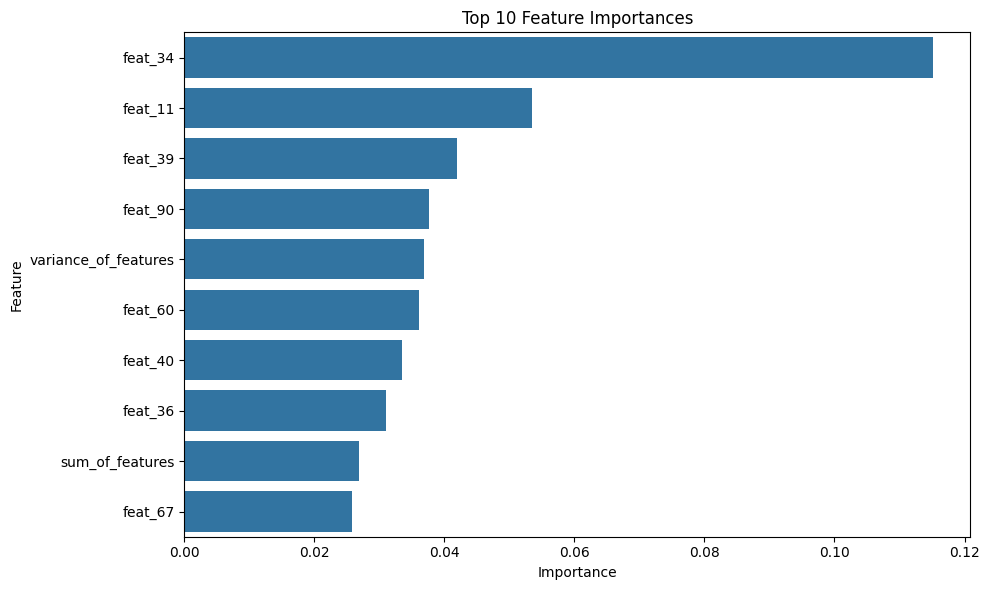

In [34]:
importances = etmodel.feature_importances_
indices = np.argsort(importances)[::-1][:10]  # Top 20 features

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()